<h1><center>Text Classification</h1></center>
<h1><center>Jing Yang</h1></center>

 

# Task 1.<a id='top'></a>

Explore the dataset. Plot the distribution of the attributes if applicable. Find most/least common words, average sentence length for textual attributes? What is the proportion of each class in the dataset? What trends can you find in your data? (0.1)
</a>

### Explore the dataset. Plot the distribution of the attributes if applicable.

In [70]:
import pandas as pd
Wikipedia_Movie_Plots = pd.read_csv("wiki_movie_plots_deduped.csv")
Wikipedia_Movie_Plots.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### Check the number of null values of each attributes.

In [71]:
Wikipedia_Movie_Plots.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [72]:
Wikipedia_Movie_Plots.shape

(34886, 8)

In [73]:
Wikipedia_Movie_Plots.Genre

0                unknown
1                unknown
2                unknown
3                unknown
4                unknown
              ...       
34881            unknown
34882             comedy
34883             comedy
34884    romantic comedy
34885           romantic
Name: Genre, Length: 34886, dtype: object

In [74]:
Wikipedia_Movie_Plots.Genre.unique().shape

(2265,)

In [75]:
Wikipedia_Movie_Plots.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [76]:
Wikipedia_Movie_Plots['Origin/Ethnicity']

0        American
1        American
2        American
3        American
4        American
           ...   
34881     Turkish
34882     Turkish
34883     Turkish
34884     Turkish
34885     Turkish
Name: Origin/Ethnicity, Length: 34886, dtype: object

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


### Plot the distribution of the Origin/Ethnicity attribute. <a href='#1'>[2]

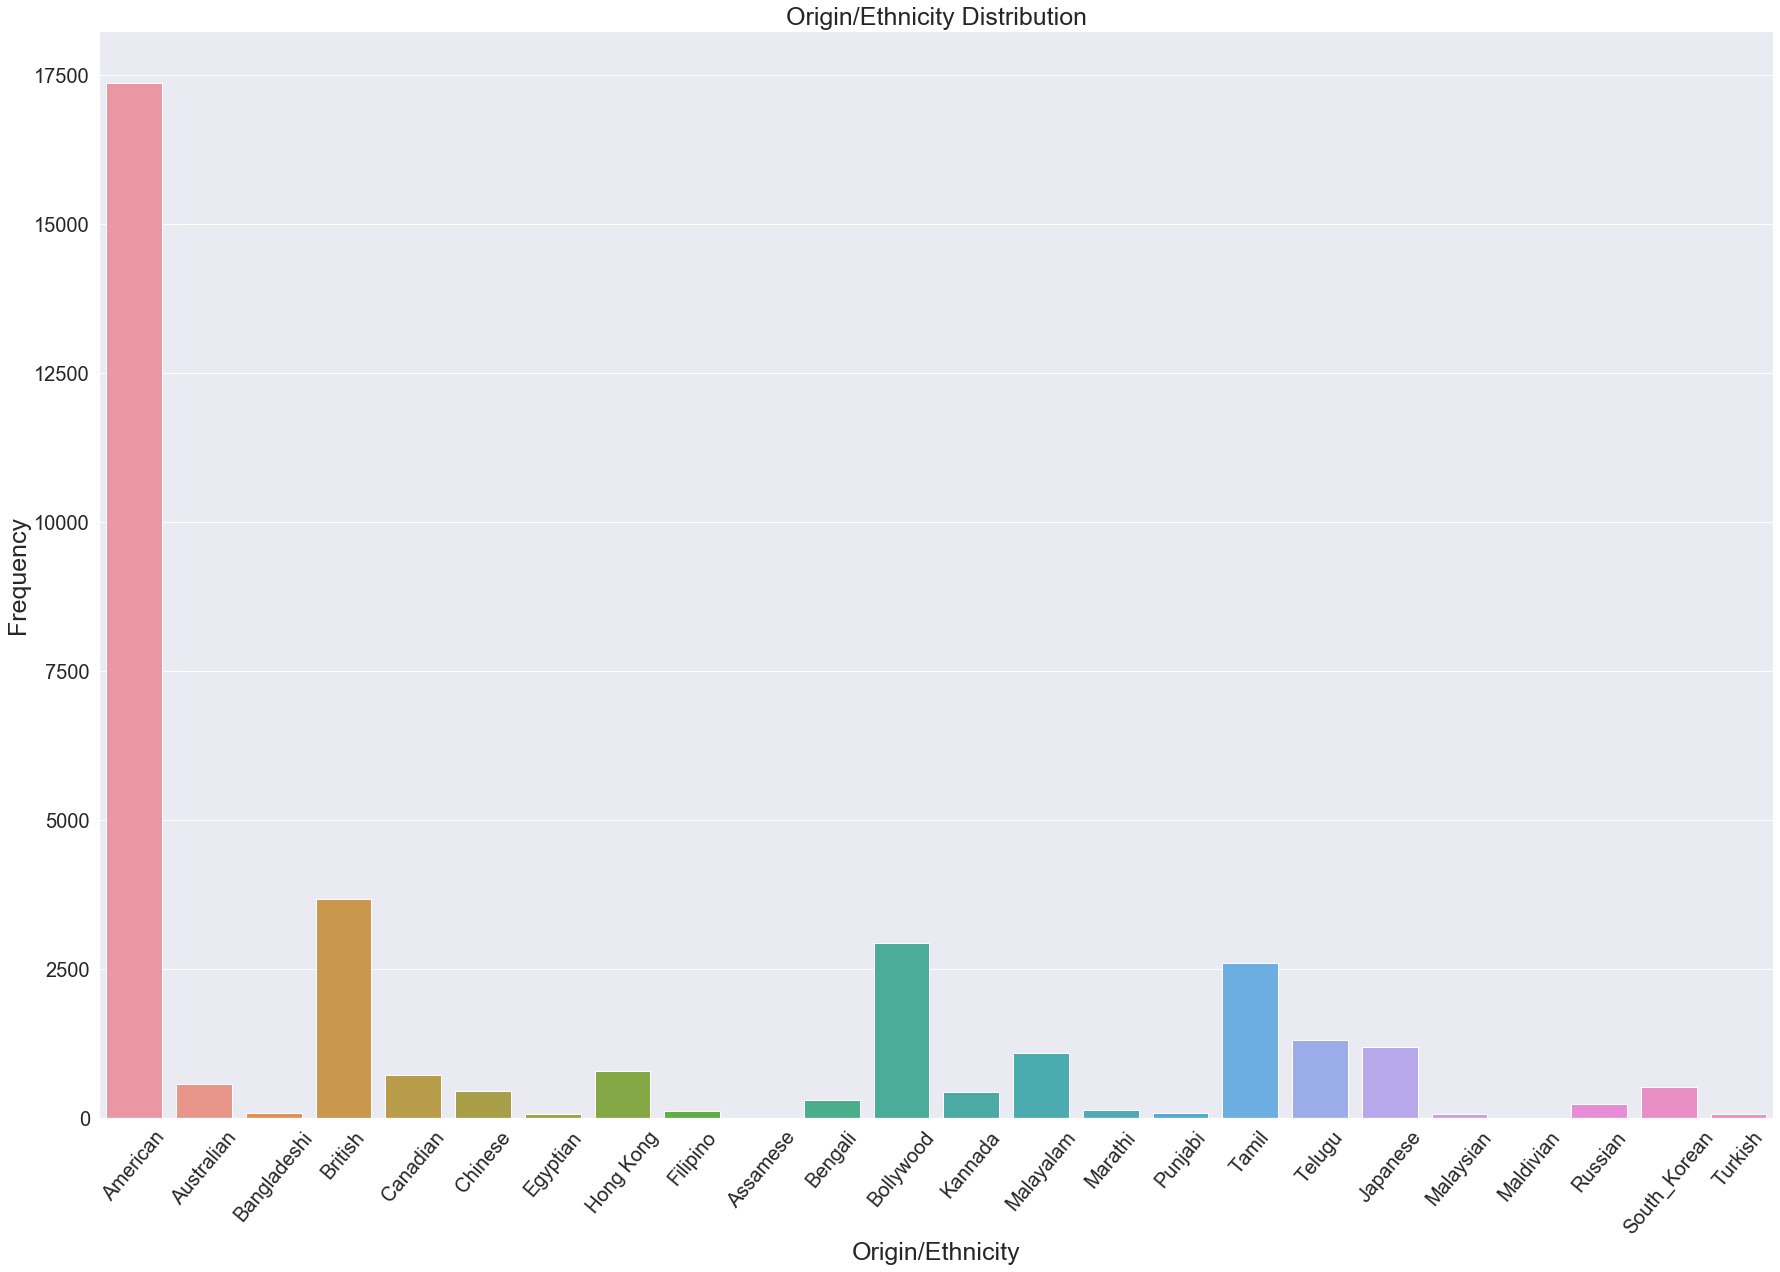

In [78]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(30,20))
sns.countplot(x=Wikipedia_Movie_Plots['Origin/Ethnicity'],data=Wikipedia_Movie_Plots,ax=ax)
plt.title('Origin/Ethnicity Distribution', fontsize=25)
plt.ylabel('Frequency', fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('Origin/Ethnicity', fontsize=25)
plt.xticks(rotation=50,fontsize=20)
plt.show()

In [79]:
Wikipedia_Movie_Plots['Origin/Ethnicity'].value_counts()

American        17377
British          3670
Bollywood        2931
Tamil            2599
Telugu           1311
Japanese         1188
Malayalam        1095
Hong Kong         791
Canadian          723
Australian        576
South_Korean      522
Chinese           463
Kannada           444
Bengali           306
Russian           232
Marathi           141
Filipino          128
Bangladeshi        87
Punjabi            84
Turkish            70
Malaysian          70
Egyptian           67
Assamese            9
Maldivian           2
Name: Origin/Ethnicity, dtype: int64

In [80]:
Wikipedia_Movie_Plots['Origin/Ethnicity'].unique().shape

(24,)

In [81]:
Wikipedia_Movie_Plots.Cast.unique().shape

(32183,)

### Plot the distribution of the Release Year attribute. <a href='#1'>[2]

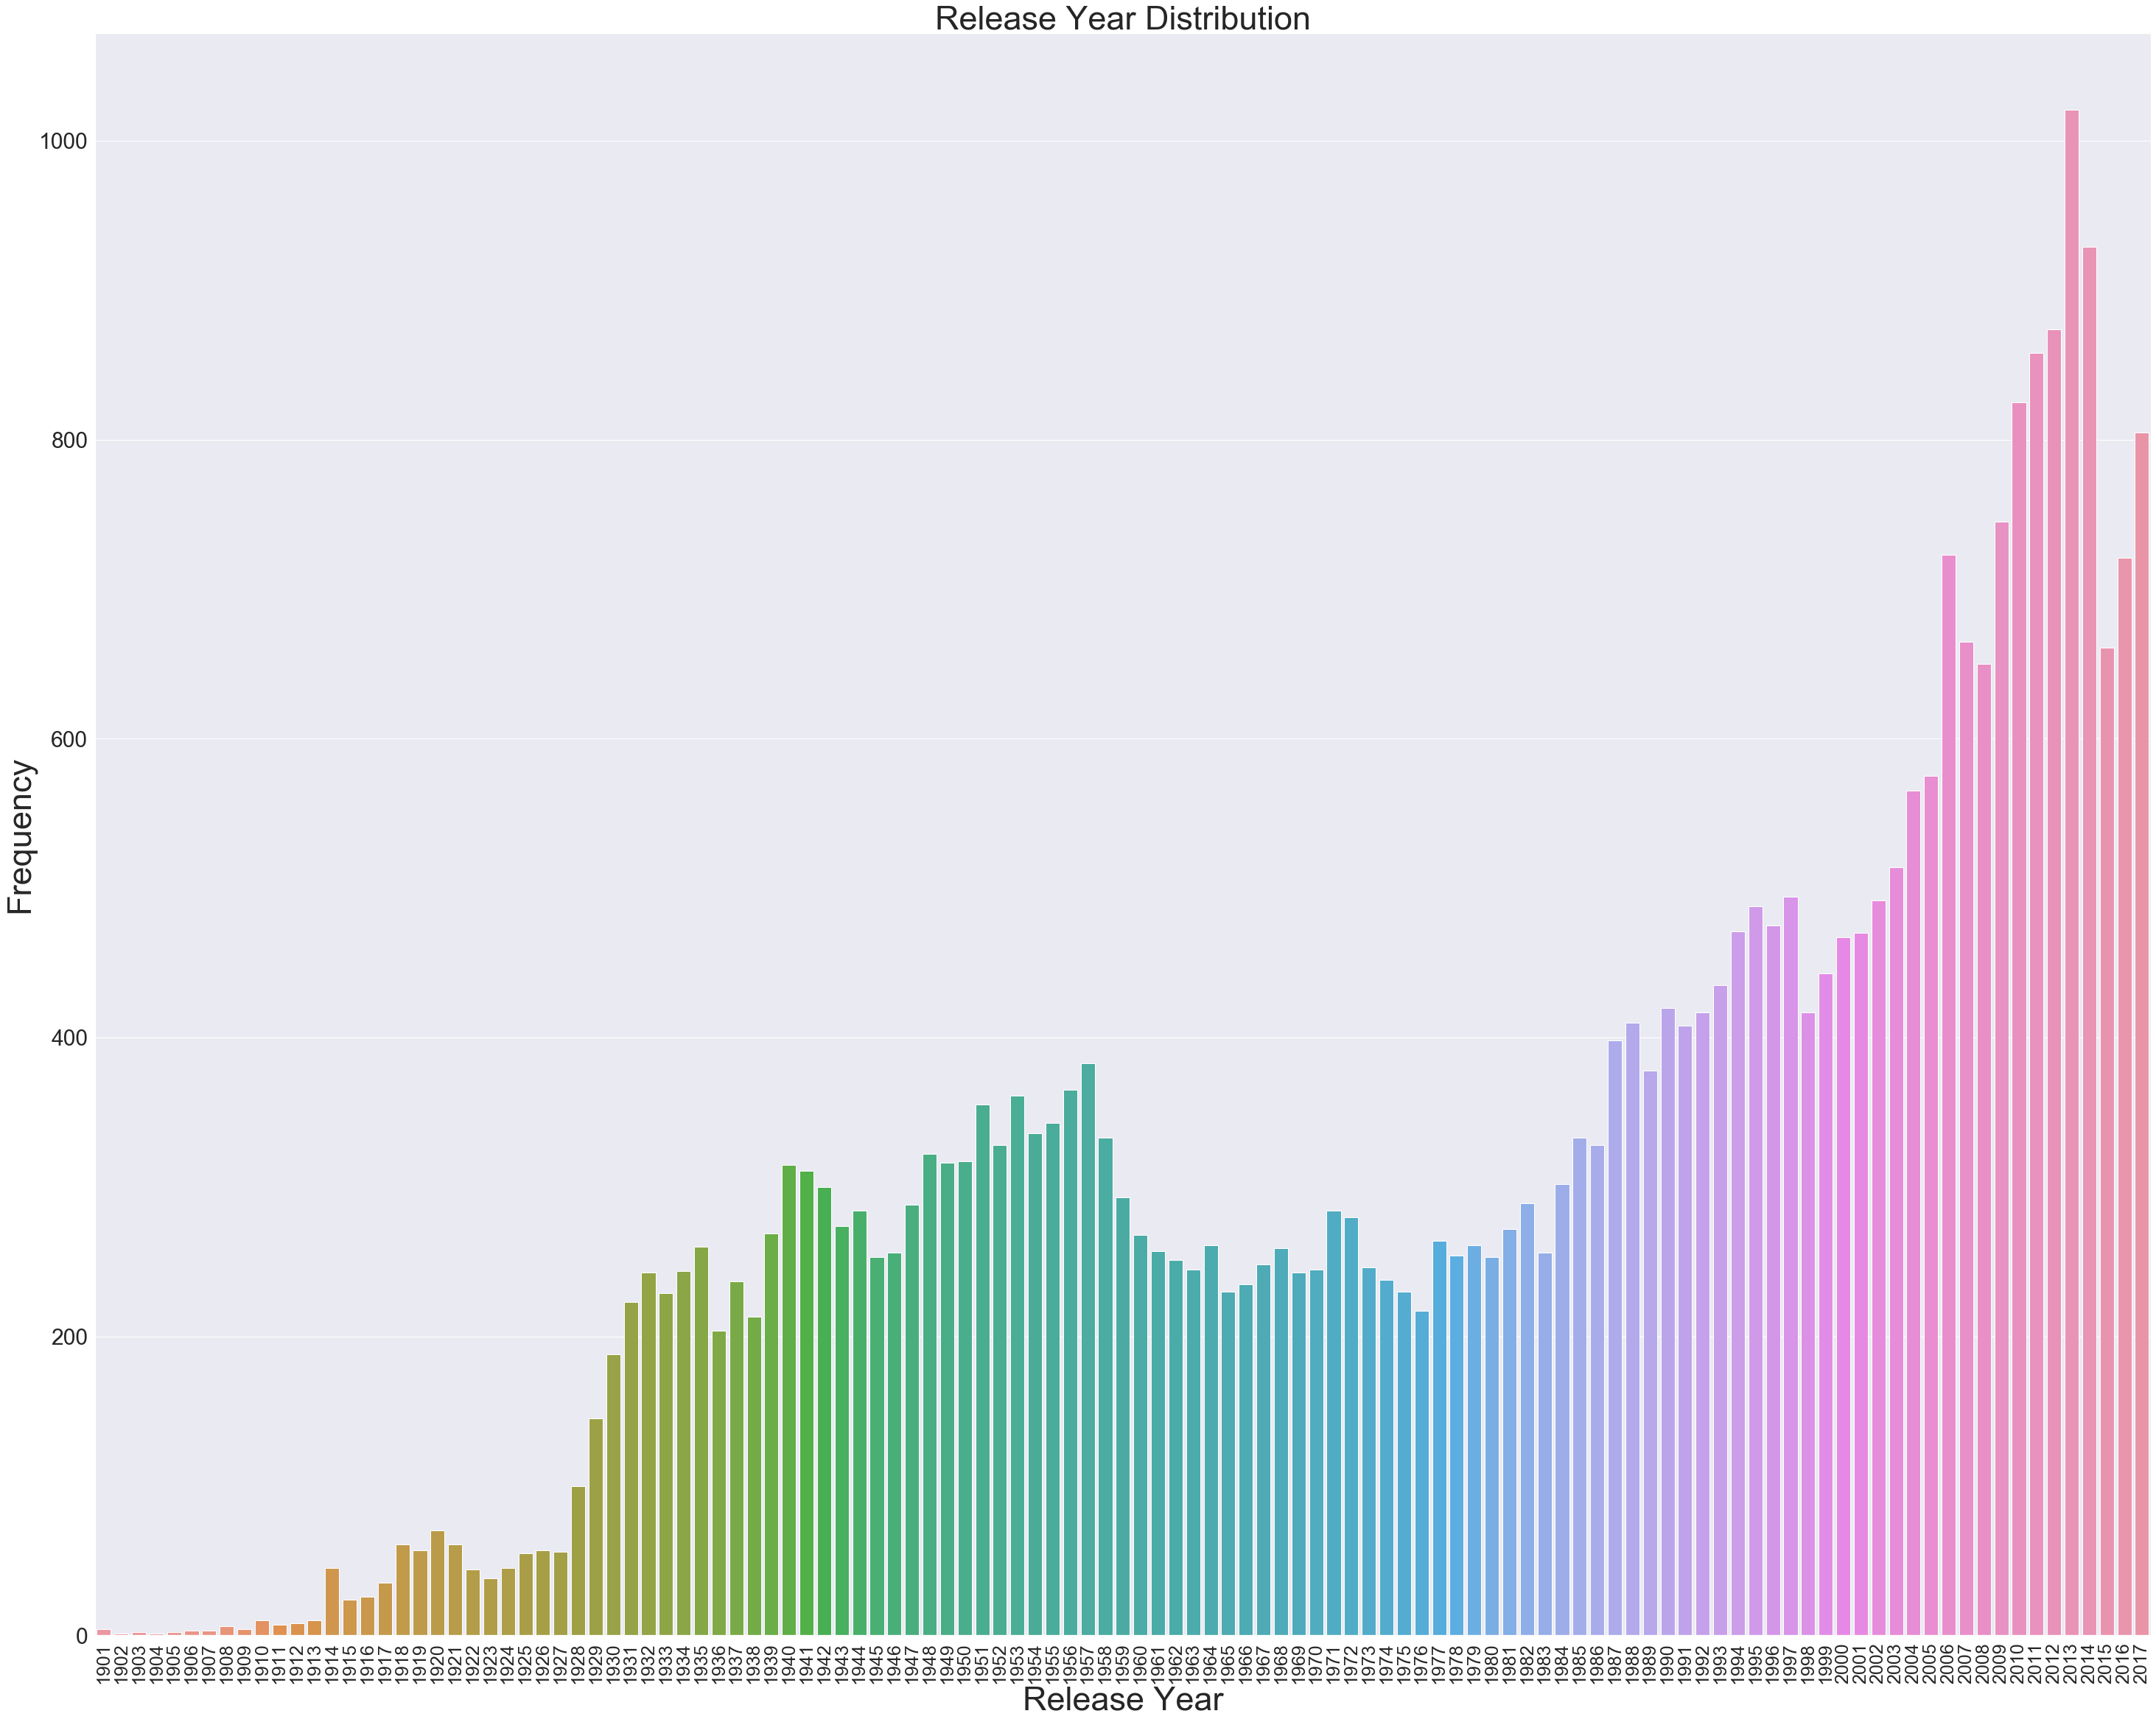

In [82]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(50,40))
sns.countplot(x=Wikipedia_Movie_Plots['Release Year'],data=Wikipedia_Movie_Plots,ax=ax)
plt.title('Release Year Distribution', fontsize=45)
plt.ylabel('Frequency', fontsize=45)
plt.yticks(fontsize=30)
plt.xlabel('Release Year', fontsize=45)
plt.xticks(rotation=90,fontsize=25)
plt.show()

### Find most/least common words, average sentence length for textual attributes.

#### Detect listing duplicates.

In [83]:
Wikipedia_Movie_Plots.duplicated().sum()

0

In [84]:
Wikipedia_Movie_Plots['Plot']

0        A bartender is working at a saloon, serving dr...
1        The moon, painted with a smiling face hangs ov...
2        The film, just over a minute long, is composed...
3        Lasting just 61 seconds and consisting of two ...
4        The earliest known adaptation of the classic f...
                               ...                        
34881    The film begins in 1919, just after World War ...
34882    Two musicians, Salih and Gürkan, described the...
34883    Zafer, a sailor living with his mother Döndü i...
34884    The film centres around a young woman named Am...
34885    The writer Orhan Şahin returns to İstanbul aft...
Name: Plot, Length: 34886, dtype: object

### Define a function for find the most/least common words, average sentence length for textual attributes.  <a href='#1'>[3][4][5]

In [85]:
# from nltk.probabiliy import the FreqDist class which is used to encode "frequency distributions", counting the
# number of times that each outcome of an experiment occurs.
from nltk.probability import FreqDist
# from nltk.tokenize import the word_tokenize word tokenizer.
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
def freq_words(x):
    # join all words
    all_words = ' '.join([text for text in x])
    # calculate frequency distributions of tokenized all words
    fdist = FreqDist(word_tokenize(all_words))
    # count the number of words
    num_words = len(word_tokenize(all_words))
    # count the number of sentences
    num_sents = len(sent_tokenize(all_words))
    # calculate the average sentence length by the number of words divided by the number of sentences.
    average_sentence_length = round(num_words/num_sents)
    # print the most/least common words, average sentence length for textual attribute.
    print('Most common words: ', fdist.most_common(1))
    print('Least common words: ', fdist.most_common()[-1:])
    print('Average sentence length for textual attribute: ', average_sentence_length)

### Find the most/least common words, average sentence length for textual attribute 'Plot'

In [86]:
freq_words(Wikipedia_Movie_Plots['Plot'])

Most common words:  [(',', 777424)]
Least common words:  [('Soysal', 1)]
Average sentence length for textual attribute:  23


## The proportion of each class in the dataset.  <a href='#1'>[6][11]

In [87]:
from collections import Counter
# Find the number of each class of Genre occurrences using Counter().
count_each_class_Genre = Counter(Wikipedia_Movie_Plots['Genre'])
# calculate and print the proportion of each class of Genre in order from highest to lowest.
[(i, count_each_class_Genre[i] / len(Wikipedia_Movie_Plots['Genre']) * 100.0) for i, count in count_each_class_Genre.most_common()]



[('unknown', 17.43679412945021),
 ('drama', 17.09568308203864),
 ('comedy', 12.55231324886774),
 ('horror', 3.345181448145388),
 ('action', 3.1473943702344775),
 ('thriller', 2.7690190907527374),
 ('romance', 2.6457604769821708),
 ('western', 2.479504672361406),
 ('crime', 1.6281602935274895),
 ('adventure', 1.5077681591469356),
 ('musical', 1.3386458751361578),
 ('crime drama', 1.3300464369661182),
 ('romantic comedy', 1.3214469987960786),
 ('science fiction', 1.1981883850255117),
 ('film noir', 0.9889353895545491),
 ('mystery', 0.8886086109040877),
 ('war', 0.7825488734735998),
 ('animation', 0.756750558963481),
 ('comedy, drama', 0.6764891360431119),
 ('sci-fi', 0.6334919451929141),
 ('family', 0.6220260276328613),
 ('fantasy', 0.5847617955626899),
 ('animated', 0.5589634810525712),
 ('musical comedy', 0.4414378260620306),
 ('comedy-drama', 0.39270767643180643),
 ('biography', 0.38984119704179326),
 ('anime', 0.32104569168147684),
 ('suspense', 0.29811385656137135),
 ('romantic dram

## What trends can you find in your data?

### For the Release Year attribute, from the above distribution of the Release Year attribute plot, we can observed that from the year 1901 to the year 2017, the number of released movies tend to more. For the Origin/Ethnicity attribute, according to the above distribution of the Origin/Ethnicity attribute plot, the highest number of released movies' Origin/Ethnicity is American, almost half of the released movies are from American. For the 'Genre' attribute, there are so many classes in the 'Genre', therefore classification for 'Genre' attribute is hard.

# Task 2.<a id='top'></a>

Select the following five movie genres (classes):
Drama, comedy, adventure, romance, western.
Some of the instances in the dataset belong to multiple genres. Be sure to motivate your selection strategy for those cases.
</a>  <a href='#1'>[15]

### Using the str.contains method to select the five genres classes into a new selected_classes_df DataFrame.  <a href='#1'>[7]

In [88]:
# The 'Genre' attribute.
Genre = Wikipedia_Movie_Plots['Genre']
# Select five movie genres (classes): Drama, comedy, adventure, romance, western
selected_classes_df = Wikipedia_Movie_Plots.loc[(Genre == 'drama') | (Genre == 'comedy') | (Genre == 'adventure') | (Genre == 'romance') | (Genre == 'western')]
selected_classes_df


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
...,...,...,...,...,...,...,...,...
34874,2011,White as Snow,Turkish,Selim Güneş,"Hakan Korkmaz, Sinem İslamoğlu & Gürkan Piri O...",drama,https://en.wikipedia.org/wiki/White_as_Snow_(f...,Hasan is a twelve-year-old boy living with his...
34875,2011,Once Upon a Time in Anatolia,Turkish,Nuri Bilge Ceylan,"Yılmaz Erdoğan, Taner Birsel & Ufuk Karaali",drama,https://en.wikipedia.org/wiki/Once_Upon_a_Time...,"Through the night, three cars carry a small gr..."
34876,2013,Selam,Turkish,Levent Demirkale,"Bucin Abdullah, Selma Alispahic, Tina Cvitanov...",drama,https://en.wikipedia.org/wiki/Selam_(film),The film opens with a Senegalese boy named Kha...
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."


# Task 3.<a id='top'></a>

Clean the text:
Remove stop words.
Remove numbers and other non-letter characters.
Perform either lemmatization or stemming. Motivate your choice.
</a>

### Define a function that remove stop words. <a href='#1'>[8][9]

In [90]:
# from nltk.corpus import the stopwords list. 
from nltk.corpus import stopwords
# set the stop words list to English stop words list.
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # split text at space and remove stop words.
    removed_stopwords_text = [w for w in text.split() if not w in stop_words]
    # rejoin removed stopwords words.
    return ' '.join(removed_stopwords_text)



**Check our 'Genre' classes using unique().**

In [91]:
selected_classes_df['Genre'].unique()

array(['western', 'comedy', 'drama', 'adventure', 'romance'], dtype=object)

**Apply the remove_stopwords() function on the 'Plot' attribute by using apply lambda.**

In [92]:
selected_classes_df['Plot'] = selected_classes_df['Plot'].apply(lambda x: remove_stopwords(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
selected_classes_df['Plot']

6        The film opens two bandits breaking railroad t...
7        The film family move suburbs, hoping quiet lif...
14       Before heading baseball game nearby ballpark, ...
15       The plot black woman going dentist toothache g...
16       On beautiful summer day father mother take dau...
                               ...                        
34874    Hasan twelve-year-old boy living two younger s...
34875    Through night, three cars carry small group me...
34876    The film opens Senegalese boy named Khadim tol...
34882    Two musicians, Salih Gürkan, described adventu...
34883    Zafer, sailor living mother Döndü coastal vill...
Name: Plot, Length: 12657, dtype: object

In [94]:
selected_classes_df['Plot'].values

array(["The film opens two bandits breaking railroad telegraph office, force operator gunpoint train stopped transmit orders engineer fill locomotive's tender station's water tank. They knock operator tie up. As train stops boarded bandits\u200d—\u200cnow four. Two bandits enter express car, kill messenger open box valuables dynamite; others kill fireman force engineer halt train disconnect locomotive. The bandits force passengers train rifle belongings. One passenger tries escape instantly shot down. Carrying loot, bandits escape locomotive, later stopping valley horses left. Meanwhile, back telegraph office, bound operator awakens, collapses again. His daughter arrives bringing meal cuts free, restores consciousness dousing water. There comic relief dance hall, Eastern stranger forced dance locals fire feet. The door suddenly opens telegraph operator rushes tell robbery. The men quickly form posse, overtakes bandits, final shootout kills recovers stolen mail.",
       'The film famil

### Define a funtion that remove numbers and other non-letter characters. <a href='#1'>[8][9][10]

In [95]:
import re

def remove_non_letter(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces caused by remove non letter characters.
    text = ' '.join(text.split())
    return text
    

**Apply the remove_non_letter() function on the 'Plot' attribute by using apply lambda**

In [96]:
selected_classes_df['Plot'] = selected_classes_df['Plot'].apply(lambda x: remove_non_letter(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Perform either lemmatization or stemming. Motivate your choice.

### Choose to preform stemming. <a href='#1'>[12]

In [98]:
# from nltk.stem import the PorterStemmer stemming algorithms module.
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

def stemming(text):
    # preform word tokenize on all of the text.
    tokens = word_tokenize(text)
    # preform stemming on all of the word tokenized text.
    stemmed_words = [ps.stem(w) for w in tokens]
    # rejoin stemmed words.
    return ' '.join(stemmed_words)


### apply stemming() function to 'Plot' attribute using lambda.

In [99]:
selected_classes_df['Plot'] = selected_classes_df['Plot'].apply(lambda x: stemming(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
type(selected_classes_df['Plot'].values)

numpy.ndarray

# Task 4.<a id='top'></a>

Convert the corpus into a bag-of-words tf-idf weighted vector representation.
</a> <a href='#1'>[13]

## Convert the corpus into a bag-of-words tf-idf weighted vector representation. <a href='#1'>[21]

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
Plot = selected_classes_df['Plot'].values
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Plot)
X_counts.shape

(12657, 54506)

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(12657, 54506)

# Task 5.<a id='top'></a>

Split the data randomly into training and testing sets (70-30 %).
Train SVM and report confusion matrix.
Train Multinomial NB and report confusion matrix.
Which algorithm has a higher weighted F1 measure and why?
Does changing the kernel of the SVM change the weighted F1 measure or decrease
confusion between classes?
</a>

### Split the data randomly into training and testing sets (70-30 %).

In [106]:
from sklearn.model_selection import train_test_split

X = X_tfidf
y = selected_classes_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Train SVM and report confusion matrix. <a href='#1'>[14]

In [107]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)

In [108]:
# fit SVM SGDClassifier to our data.
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [109]:
from sklearn.metrics import accuracy_score
# make prediction.
predicted = clf.predict(X_test)
# print the Accuracy of SVM.
print("Accuracy of SVM(SGDClassifier): ", accuracy_score(y_test, predicted))

Accuracy of SVM(SGDClassifier):  0.6074249605055292


### Report confusion matrix

In [110]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predicted)

array([[  11,   12,  146,    0,    4],
       [   0,  440,  894,    1,    8],
       [   0,   61, 1698,    0,    2],
       [   0,    7,  248,    5,    0],
       [   0,    5,  103,    0,  153]])

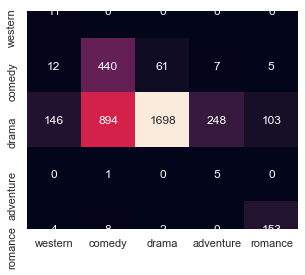

In [111]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_df['Genre'].unique(), yticklabels=selected_classes_df['Genre'].unique())

### Classification report

In [112]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       1.00      0.06      0.12       173
      comedy       0.84      0.33      0.47      1343
       drama       0.55      0.96      0.70      1761
     romance       0.83      0.02      0.04       260
     western       0.92      0.59      0.71       261

    accuracy                           0.61      3798
   macro avg       0.83      0.39      0.41      3798
weighted avg       0.72      0.61      0.55      3798



### Train SVM(SVC) and report confusion matrix. <a href='#1'>[20]

In [113]:
from sklearn import svm
# initialize our svm.SVC model wity kernel is 'linear'.
linear_svc = svm.SVC(kernel='linear')
# fit svm.SVC to our data.
linear_svc.fit(X_train, y_train)
# make prediction.
predicted = linear_svc.predict(X_test)
# print the Accuracy of SVM.
print("Accuracy of SVM(SVC): ", accuracy_score(y_test, predicted))

Accuracy of SVM(SVC):  0.6074249605055292


### Report confusion matrix

In [114]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predicted)

array([[  11,   12,  146,    0,    4],
       [   0,  440,  894,    1,    8],
       [   0,   61, 1698,    0,    2],
       [   0,    7,  248,    5,    0],
       [   0,    5,  103,    0,  153]])

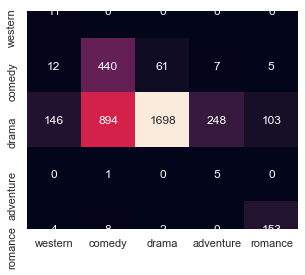

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_df['Genre'].unique(), yticklabels=selected_classes_df['Genre'].unique())

### Classification report

In [116]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       1.00      0.06      0.12       173
      comedy       0.84      0.33      0.47      1343
       drama       0.55      0.96      0.70      1761
     romance       0.83      0.02      0.04       260
     western       0.92      0.59      0.71       261

    accuracy                           0.61      3798
   macro avg       0.83      0.39      0.41      3798
weighted avg       0.72      0.61      0.55      3798



## Train Multinomial NB and report confusion matrix.<a href='#1'>[14]

In [117]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
# fit Multinomial NB classifier to our data.
clf.fit(X_train, y_train)

MultinomialNB()

In [118]:
from sklearn.metrics import accuracy_score
# make prediction.
predicted = clf.predict(X_test)
# print the Accuracy of Multinomial NB.
print("Accuracy of Multinomial NB: ", accuracy_score(y_test, predicted))

Accuracy of Multinomial NB:  0.5071090047393365


### Report confusion matrix

In [119]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predicted)

array([[   0,    3,  170,    0,    0],
       [   0,  178, 1165,    0,    0],
       [   0,   13, 1748,    0,    0],
       [   0,    2,  258,    0,    0],
       [   0,    6,  255,    0,    0]])

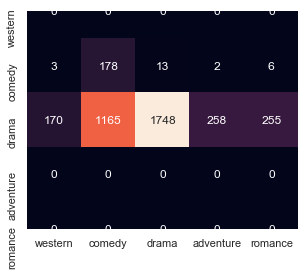

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_df['Genre'].unique(), yticklabels=selected_classes_df['Genre'].unique())

### Classification report

In [121]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       0.00      0.00      0.00       173
      comedy       0.88      0.13      0.23      1343
       drama       0.49      0.99      0.65      1761
     romance       0.00      0.00      0.00       260
     western       0.00      0.00      0.00       261

    accuracy                           0.51      3798
   macro avg       0.27      0.23      0.18      3798
weighted avg       0.54      0.51      0.38      3798



/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Which algorithm has a higher weighted F1 measure and why?

### According to the above classification reports, we can see that the weighted average F1 measure of the SVM model is 0.55, the weighted average F1 measure of the Multinomial NB model is 0.38, therefore, SVM algorithm has a higher weighted F1 measure. The reason is that the F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

## Does changing the kernel of the SVM change the weighted F1 measure or decrease confusion between classes?

### Using GridSearchCV which exhaustive search over specified parameter values for an estimator, for tuning the hyperparameter 'kernel' to determining whether changing the kernel of SVM change the weighted F1 measure or decrease confusion between classes.<a href='#1'>[18][19]

In [122]:
# import GridSearchCV which exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Set the GridSearchCV hyperparameters 'kernel' of SVC to be 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
param_grid_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# GridSearchCV with our SVC model.
grid_search = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=3)
# fitting the model for GridSearchCV.
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... kernel=linear, score=0.687, total= 1.1min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.717, total= 1.2min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.3min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.692, total= 1.0min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.701, total= 1.1min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.677, total= 1.2min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.484, total= 1.8min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.484, total= 1.9min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.484, total= 1.9min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.488, total= 1.9min
[CV] kernel=poly .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 28.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [123]:
# print best parameter and estimator after tuning.
print("grid_search best params : ", grid_search.best_params_, "grid_search best estimator ", grid_search.best_estimator_)





grid_search best params :  {'kernel': 'linear'} grid_search best estimator  SVC(kernel='linear')


In [124]:
# make predictions.
grid_predictions = grid_search.predict(X_test)
# print the Accuracy of SVM.
print("Accuracy of SVM(SVC) after tuning kernel hyperparameter: ", accuracy_score(y_test, grid_predictions))

Accuracy of SVM(SVC) after tuning kernel hyperparameter:  0.7037914691943128


### Report confusion matrix

In [126]:
from sklearn import metrics
metrics.confusion_matrix(y_test, grid_predictions)

array([[  45,   17,  104,    0,    7],
       [   3,  907,  416,   11,    6],
       [   1,  273, 1460,   24,    3],
       [   0,   45,  163,   52,    0],
       [   1,   11,   40,    0,  209]])

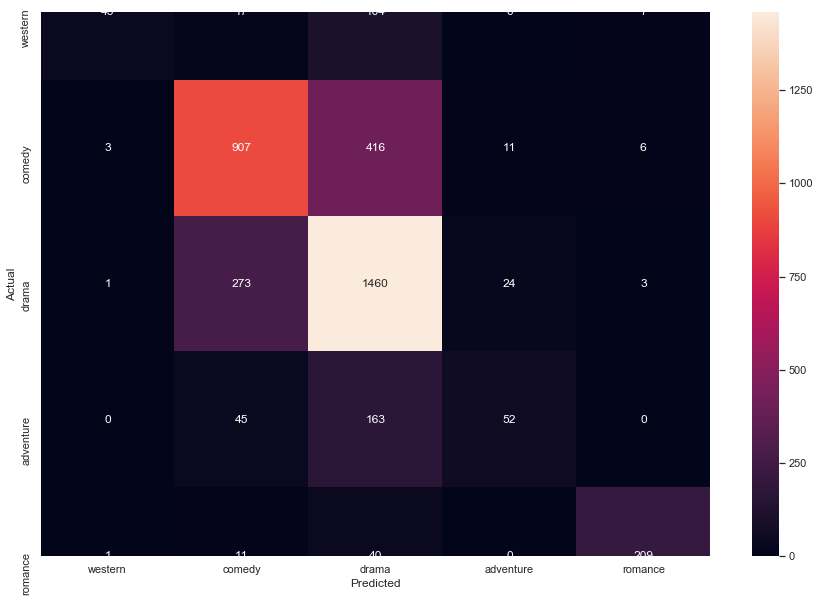

In [127]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, grid_predictions)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=selected_classes_df['Genre'].unique(), yticklabels=selected_classes_df['Genre'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [128]:
# print classification report.
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

   adventure       0.90      0.26      0.40       173
      comedy       0.72      0.68      0.70      1343
       drama       0.67      0.83      0.74      1761
     romance       0.60      0.20      0.30       260
     western       0.93      0.80      0.86       261

    accuracy                           0.70      3798
   macro avg       0.76      0.55      0.60      3798
weighted avg       0.71      0.70      0.69      3798



## From the above GridSearchCV approach for tuning the kernel hyperparamter, we can find that changing the kernel of the SVM make influences on the weighted F1 measure and the confusion between classes.

# Task 6.<a id='top'></a>

Perform part-of-speech tagging on the raw data (i.e. prior to cleaning it), clean as in Task 3, and extract the nouns only to obtain a bag-of-words tf-idf weighted vector representation using only the nouns. Repeat question Task 5. How does this weighted F1 measure compare with that of Task 5? How does the size of the vocabulary compare with that of Task 5?
</a>

## Perform part-of-speech tagging on the raw data (i.e. prior to cleaning it).

### Firstly get the raw data.

In [148]:
Wikipedia_Movie_Plots_raw = pd.read_csv("wiki_movie_plots_deduped.csv")
Wikipedia_Movie_Plots_raw.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### Select Drama, comedy, adventure, romance, western Genre classes.

In [149]:
# The 'Genre' attribute.
Genre = Wikipedia_Movie_Plots_raw['Genre']
# Select five movie genres (classes): Drama, comedy, adventure, romance, western
selected_classes_raw_df = Wikipedia_Movie_Plots_raw.loc[(Genre == 'drama') | (Genre == 'comedy') | (Genre == 'adventure') | (Genre == 'romance') | (Genre == 'western')]
selected_classes_raw_df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
14,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...
15,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...
16,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...
...,...,...,...,...,...,...,...,...
34874,2011,White as Snow,Turkish,Selim Güneş,"Hakan Korkmaz, Sinem İslamoğlu & Gürkan Piri O...",drama,https://en.wikipedia.org/wiki/White_as_Snow_(f...,Hasan is a twelve-year-old boy living with his...
34875,2011,Once Upon a Time in Anatolia,Turkish,Nuri Bilge Ceylan,"Yılmaz Erdoğan, Taner Birsel & Ufuk Karaali",drama,https://en.wikipedia.org/wiki/Once_Upon_a_Time...,"Through the night, three cars carry a small gr..."
34876,2013,Selam,Turkish,Levent Demirkale,"Bucin Abdullah, Selma Alispahic, Tina Cvitanov...",drama,https://en.wikipedia.org/wiki/Selam_(film),The film opens with a Senegalese boy named Kha...
34882,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the..."


### Perform part-of-speech tagging on textual attribute 'Plot'.

**Define a function for part-of-speech tagging**

In [150]:
from nltk import pos_tag, word_tokenize
def pos_tagging(text):
    # preform word tokenize on all of the text.
    tokens = word_tokenize(text)
    # preform part-of-speech tagging on all of the word tokenized text.
    pos_tagging = pos_tag(tokens)
    
    return pos_tagging

### Apply pos_tagging function to 'Plot' attribute of selected_classes_raw_df.

In [151]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: pos_tagging(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
type(selected_classes_raw_df['Plot'].values)

numpy.ndarray

### Extract the nouns of attribute 'Plot' using lambda. <a href='#1'>[17]

In [153]:
selected_classes_raw_df.Plot = selected_classes_raw_df.Plot.apply(lambda x: [(t[0],) for t in x if t[1]=='NN' or t[1]=='NNP' or t[1]=='NNS' or t[1]=='NNPS'])



/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [154]:
selected_classes_raw_df.Plot

6        [(film,), (bandits,), (railroad,), (telegraph,...
7        [(film,), (family,), (suburbs,), (life,), (Thi...
14       [(baseball,), (game,), (ballpark,), (sports,),...
15       [(plot,), (woman,), (dentist,), (toothache,), ...
16       [(summer,), (day,), (father,), (mother,), (dau...
                               ...                        
34874    [(Hasan,), (boy,), (living,), (siblings,), (mo...
34875    [(night,), (cars,), (group,), (men,), (–,), (p...
34876    [(film,), (boy,), (Khadim,), (sister,), (Aya,)...
34882    [(musicians,), (Salih,), (Gürkan,), (adventure...
34883    [(Zafer,), (sailor,), (living,), (mother,), (D...
Name: Plot, Length: 12657, dtype: object

In [155]:
# Function that convert list of tuples to list of strings.
def to_text(words):
    # using list comprehension.
    text = [item for t in words for item in t]
    
    return text

### Apply to_text() function to all of the rows of 'Plot' using lambda.

In [156]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: to_text(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [157]:
type(selected_classes_raw_df['Plot'].values[0])

list

**Define a function that convert a list to string using join() function**<a href='#1'>[16]

In [158]:
# Function that join all the strings in lists of 'Plot' attribute, resulting in a string type.
def join_words(words):
    # initialize an empty string.
    strl = " "
    # return string
    return (strl.join(words))


### Apply join_words() function to all of the rows of 'Plot' using lambda.

In [159]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: join_words(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [160]:
type(selected_classes_raw_df['Plot'].values[0])

str

### Apply remove_stopwords() function to the 'Plot' attribute using lambda. (Remove stop words)

In [161]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: remove_stopwords(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [162]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: remove_non_letter(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Apply stemming() function to the 'Plot' attribute using lambda.(Perform stemming)

In [163]:
selected_classes_raw_df['Plot'] = selected_classes_raw_df['Plot'].apply(lambda x: stemming(x))

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [164]:
# Check the first 5 rows of 'Plot'.
selected_classes_raw_df['Plot'].values[0:5]

array(['film bandit railroad telegraph offic oper gunpoint train order engin locomot tender station water tank oper train bandit express car messeng box valuabl dynamit other fireman forc engin train locomot bandit passeng train belong passeng loot bandit escap locomot valley hors telegraph offic bound oper awaken daughter meal water relief danc hall stranger local fire feet door telegraph oper rush robberi men poss bandit shootout kill mail',
       'film famili suburb life thing wife crockeri arrest',
       'basebal game ballpark sport Mr brown highbal cocktail ballpark game game revers player base backward basebal pitcher hand game Mr brown home friend brown hous wife friend proce husband intox',
       'plot woman dentist toothach ga way walk home situat laugh everyon catch laughter vendor polic offic',
       'summer day father mother daughter dolli outing river mother gypsi ware gypsi mother father gypsi return camp plan dolli parent rescu crew gypsi dolli camp dolli barrel resc

## Obtain a bag-of-words tf-idf weighted vector representation using only the nouns.

In [165]:
Plot = selected_classes_raw_df['Plot'].values
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(Plot)
X_counts.shape

(12657, 50440)

In [166]:
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(12657, 50440)

## Repeat Task 5.

### Split the data randomly into training and testing sets (70-30 %).

In [167]:
X = X_tfidf
y = selected_classes_raw_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Train SVM and report confusion matrix. <a href='#1'>[14]

In [168]:
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
# fit the SVM SGDClassifier to our data.
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [169]:
# make prediction.
predicted = clf.predict(X_test)
# prin the Accuracy of SVM.
print("Accuracy of SVM: ", accuracy_score(y_test, predicted))

Accuracy of SVM:  0.6190100052659294


### Report confusion matrix.

In [170]:
metrics.confusion_matrix(y_test, predicted)

array([[  18,   16,  120,    0,    3],
       [   1,  467,  831,    4,    4],
       [   4,  102, 1694,    0,    6],
       [   0,    9,  255,    4,    0],
       [   0,    5,   87,    0,  168]])

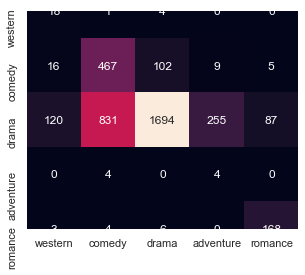

In [171]:
mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

### Classification report.

In [172]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       0.78      0.11      0.20       157
      comedy       0.78      0.36      0.49      1307
       drama       0.57      0.94      0.71      1806
     romance       0.50      0.01      0.03       268
     western       0.93      0.65      0.76       260

    accuracy                           0.62      3798
   macro avg       0.71      0.41      0.44      3798
weighted avg       0.67      0.62      0.57      3798



## Train Multinomial NB and report confusion matrix.<a href='#1'>[14]

In [173]:
clf = MultinomialNB()
# fit Multinomial NB classifier to our data.
clf.fit(X_train, y_train)

MultinomialNB()

In [174]:
# make prediction
predicted = clf.predict(X_test)
# print the Accuracy of Multinomial NB.
print("Accuracy of Multinomial NB: ", accuracy_score(y_test, predicted))

Accuracy of Multinomial NB:  0.5389678778304371


### Report confusion matrix

In [175]:
metrics.confusion_matrix(y_test, predicted)

array([[   0,    4,  153,    0,    0],
       [   0,  276, 1031,    0,    0],
       [   0,   35, 1771,    0,    0],
       [   0,    6,  262,    0,    0],
       [   0,    8,  252,    0,    0]])

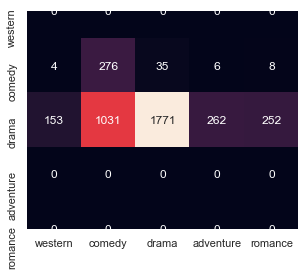

In [176]:
mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

### Classification report

In [177]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       0.00      0.00      0.00       157
      comedy       0.84      0.21      0.34      1307
       drama       0.51      0.98      0.67      1806
     romance       0.00      0.00      0.00       268
     western       0.00      0.00      0.00       260

    accuracy                           0.54      3798
   macro avg       0.27      0.24      0.20      3798
weighted avg       0.53      0.54      0.44      3798



/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
from sklearn import svm
# initialize our svm.SVC model wity kernel is 'linear'.
linear_svc = svm.SVC(kernel='linear')
# fit svm.SVC to our data.
linear_svc.fit(X_train, y_train)
# make prediction.
predicted = linear_svc.predict(X_test)
# print the Accuracy of SVM.
print("Accuracy of SVM(SVC): ", accuracy_score(y_test, predicted))

Accuracy of SVM(SVC):  0.6721958925750395


In [192]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predicted)

array([[  37,   31,   87,    0,    2],
       [   6,  798,  487,   12,    4],
       [   6,  307, 1467,   17,    9],
       [   0,   43,  174,   51,    0],
       [   2,   14,   44,    0,  200]])

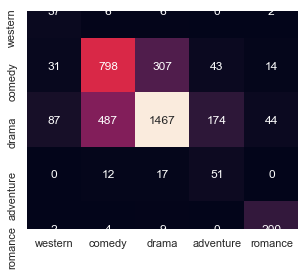

In [193]:
mat = confusion_matrix(y_test, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

In [194]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

   adventure       0.73      0.24      0.36       157
      comedy       0.67      0.61      0.64      1307
       drama       0.65      0.81      0.72      1806
     romance       0.64      0.19      0.29       268
     western       0.93      0.77      0.84       260

    accuracy                           0.67      3798
   macro avg       0.72      0.52      0.57      3798
weighted avg       0.68      0.67      0.66      3798



In [182]:
# import GridSearchCV which exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Set the GridSearchCV hyperparameters 'kernel' of SVC to be 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
param_grid_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# GridSearchCV with our SVC model.
grid_search = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=3)
# fitting the model for GridSearchCV.
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... kernel=linear, score=0.640, total=  38.0s
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.0s remaining:    0.0s


[CV] ....................... kernel=linear, score=0.659, total=  43.4s
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.4min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.635, total=  39.1s
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.638, total=  41.4s
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.670, total=  38.4s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.481, total=  55.2s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.479, total=  58.5s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.477, total=  58.3s
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.477, total=  59.3s
[CV] kernel=poly .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 15.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [184]:
# print best parameter and estimator after tuning.
print("grid_search best params : ", grid_search.best_params_, "grid_search best estimator ", grid_search.best_estimator_)





grid_search best params :  {'kernel': 'linear'} grid_search best estimator  SVC(kernel='linear')


In [186]:
# make predictions.
grid_predictions = grid_search.predict(X_test)
# print the Accuracy of SVM.
print("Accuracy of SVM(SVC) after tuning kernel hyperparameter: ", accuracy_score(y_test, grid_predictions))

Accuracy of SVM(SVC) after tuning kernel hyperparameter:  0.6721958925750395


In [187]:
metrics.confusion_matrix(y_test, grid_predictions)

array([[  37,   31,   87,    0,    2],
       [   6,  798,  487,   12,    4],
       [   6,  307, 1467,   17,    9],
       [   0,   43,  174,   51,    0],
       [   2,   14,   44,    0,  200]])

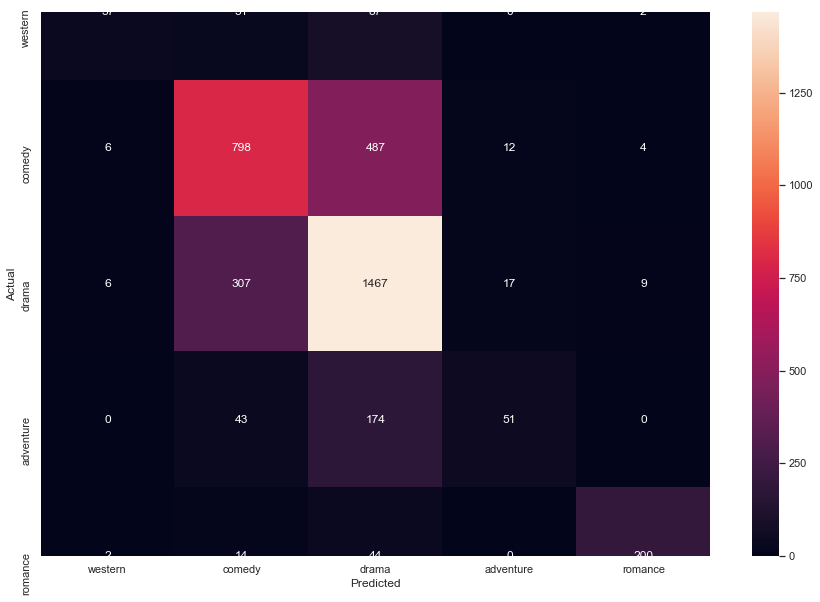

In [188]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, grid_predictions)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [189]:
# print classification report.
print(metrics.classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

   adventure       0.73      0.24      0.36       157
      comedy       0.67      0.61      0.64      1307
       drama       0.65      0.81      0.72      1806
     romance       0.64      0.19      0.29       268
     western       0.93      0.77      0.84       260

    accuracy                           0.67      3798
   macro avg       0.72      0.52      0.57      3798
weighted avg       0.68      0.67      0.66      3798



## How does this weighted F1 measure compare with that of Task 5?

### According to the above classification reports, in Task 5, we can see that the weighted average F1 measure of the SVM model is 0.69 after tuning the kernel hyperparameter, the weighted average F1 measure of the Multinomial NB model is 0.38, here, we have weighted average F1 measure of the SVM model is 0.66 after tuning hyperparameter kernel, for Multinomial NB model is 0.44. Therefore the weighted F1 measure of SVM model is lower than that of Task 5, but for Multinomial NB is higher than that of Task 5.

## How does the size of the vocabulary compare with that of Task 5?

### According to above bag-of-words tf-idf weighted vector, the shape of the bag-of-words tf-idf weighted vector of corpus in Task 5 is (12657, 54506), in Task 6 is (12657, 50440), therefore, the size of the vocabulary is less than that of Task 5.

# Task 7.<a id='top'></a>

Fix the class imbalance by the resampling strategy of your choice. Repeat Task 5 and compare the performance with what you received in Task 5. Discuss your findings.
</a>

In [195]:
# Check the proportions of each class.
from collections import Counter
# print the times of each class occurs for training and testing data set.
print("y_train counter: ", Counter(y_train))
print("y_test counter: ", Counter(y_test))

y_train counter:  Counter({'drama': 4158, 'comedy': 3072, 'romance': 655, 'western': 605, 'adventure': 369})
y_test counter:  Counter({'drama': 1806, 'comedy': 1307, 'romance': 268, 'western': 260, 'adventure': 157})


## Fix the class imbalance by apply the sythetic over-sampling approach SMOTE to our imbalanced data.

In [196]:
# import the SMOTE from imblearn.over_sampling library.
import imblearn
from imblearn.over_sampling import SMOTE
# resample all classes but the majority class.
sm = SMOTE('not majority')
# fit sythetic over-sampling approach SMOTE to our data.
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

/Users/jingyang/opt/anaconda3/lib/python3.7/site-packages/imblearn/utils/_validation.py:638: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [197]:
# check fixed imbalanced class.
Counter(y_train_sm)

Counter({'comedy': 4158,
         'romance': 4158,
         'drama': 4158,
         'western': 4158,
         'adventure': 4158})

In [198]:
# resample all classes but the majority class.
sm = SMOTE('not majority')
# fit sythetic over-sampling approach SMOTE to our data.
X_test_sm, y_test_sm = sm.fit_sample(X_test, y_test)

In [199]:
# check fixed imbalanced class.
Counter(y_test_sm)

Counter({'drama': 1806,
         'comedy': 1806,
         'western': 1806,
         'adventure': 1806,
         'romance': 1806})

# Repeat Task 5.

### Train SVM and report confusion matrix. <a href='#1'>[14]

In [200]:
clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
# fit SVM SGDClassifier to our data.
clf.fit(X_train_sm, y_train_sm)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [201]:
# make prediction.
predicted = clf.predict(X_test_sm)
# print the Accuracy of SVM model.
print("Accuracy of SVM: ", accuracy_score(y_test_sm, predicted))

Accuracy of SVM:  0.6906976744186046


### Report confusion matrix.

In [202]:
metrics.confusion_matrix(y_test_sm, predicted)

array([[1552,   30,   38,   31,  155],
       [ 220,  947,  124,  307,  208],
       [ 243,  354,  462,  490,  257],
       [  44,  142,   86, 1502,   32],
       [  23,    6,    0,    3, 1774]])

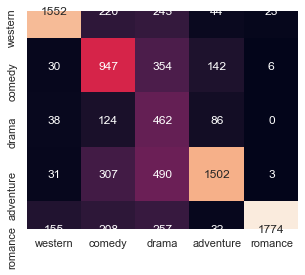

In [203]:
mat = confusion_matrix(y_test_sm, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

### Classification report.

In [204]:
print(metrics.classification_report(y_test_sm, predicted))

              precision    recall  f1-score   support

   adventure       0.75      0.86      0.80      1806
      comedy       0.64      0.52      0.58      1806
       drama       0.65      0.26      0.37      1806
     romance       0.64      0.83      0.73      1806
     western       0.73      0.98      0.84      1806

    accuracy                           0.69      9030
   macro avg       0.68      0.69      0.66      9030
weighted avg       0.68      0.69      0.66      9030



## Train Multinomial NB and report confusion matrix.<a href='#1'>[14]

In [205]:
clf = MultinomialNB()
# fit Multinomial NB classifier to our data.
clf.fit(X_train_sm, y_train_sm)
# make prediction.
predicted = clf.predict(X_test_sm)
# print the Accuracy of Multinomial NB.
print("Accuracy of Multinomial NB: ", accuracy_score(y_test_sm, predicted))

Accuracy of Multinomial NB:  0.7304540420819491


### Report confusion matrix.

In [206]:
metrics.confusion_matrix(y_test_sm, predicted)

array([[1403,  132,  183,    5,   83],
       [  75, 1321,  235,  143,   32],
       [ 110,  538,  794,  269,   95],
       [  19,  268,  203, 1316,    0],
       [  19,   18,    7,    0, 1762]])

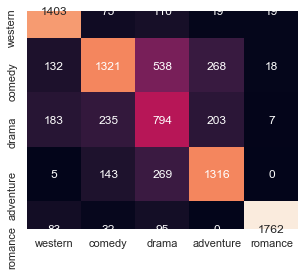

In [207]:
mat = confusion_matrix(y_test_sm, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

### Classification report.

In [208]:
print(metrics.classification_report(y_test_sm, predicted))

              precision    recall  f1-score   support

   adventure       0.86      0.78      0.82      1806
      comedy       0.58      0.73      0.65      1806
       drama       0.56      0.44      0.49      1806
     romance       0.76      0.73      0.74      1806
     western       0.89      0.98      0.93      1806

    accuracy                           0.73      9030
   macro avg       0.73      0.73      0.73      9030
weighted avg       0.73      0.73      0.73      9030



## Compare the performance with what you received in Task 5. Discuss your findings.

In [209]:
from sklearn import svm
# initialize our svm.SVC model wity kernel is 'linear'.
linear_svc = svm.SVC(kernel='linear')
# fit svm.SVC to our data.
linear_svc.fit(X_train_sm, y_train_sm)
# make prediction.
predicted = linear_svc.predict(X_test_sm)
# print the Accuracy of SVM.
print("Accuracy of SVM(SVC): ", accuracy_score(y_test_sm, predicted))

Accuracy of SVM(SVC):  0.6246954595791805


In [210]:
from sklearn import metrics
metrics.confusion_matrix(y_test_sm, predicted)

array([[ 763,  263,  743,   19,   18],
       [  10, 1236,  512,   40,    8],
       [  27,  379, 1314,   75,   11],
       [   2,  299,  773,  732,    0],
       [  18,   52,  140,    0, 1596]])

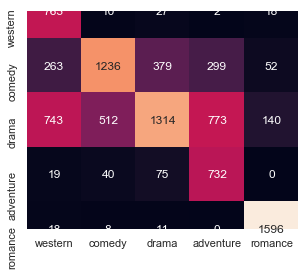

In [211]:
mat = confusion_matrix(y_test_sm, predicted)

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=selected_classes_raw_df['Genre'].unique(), yticklabels=selected_classes_raw_df['Genre'].unique())

In [212]:
print(metrics.classification_report(y_test_sm, predicted))

              precision    recall  f1-score   support

   adventure       0.93      0.42      0.58      1806
      comedy       0.55      0.68      0.61      1806
       drama       0.38      0.73      0.50      1806
     romance       0.85      0.41      0.55      1806
     western       0.98      0.88      0.93      1806

    accuracy                           0.62      9030
   macro avg       0.74      0.62      0.63      9030
weighted avg       0.74      0.62      0.63      9030



In [213]:
# import GridSearchCV which exhaustive search over specified parameter values for an estimator.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# Set the GridSearchCV hyperparameters 'kernel' of SVC to be 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'.
param_grid_svc = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
# GridSearchCV with our SVC model.
grid_search = GridSearchCV(SVC(), param_grid_svc, refit=True, verbose=3)
# fitting the model for GridSearchCV.
grid_search.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... kernel=linear, score=0.872, total= 2.1min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.886, total= 1.8min
[CV] kernel=linear ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.9min remaining:    0.0s


[CV] ....................... kernel=linear, score=0.886, total= 2.2min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.899, total= 1.9min
[CV] kernel=linear ...................................................
[CV] ....................... kernel=linear, score=0.928, total= 1.9min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.872, total= 4.2min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.878, total= 3.7min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.881, total= 3.9min
[CV] kernel=poly .....................................................
[CV] ......................... kernel=poly, score=0.893, total= 3.9min
[CV] kernel=poly .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 50.9min finished


GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

## Compare the performance with what you received in Task 5. Discuss your findings.

## According to the above classification reports, in Task 5, we can see that the weighted average F1 measure of the SVM model is 0.69 after tuning the kernel hyperparameter, the weighted average F1 measure of the Multinomial NB model is 0.38, here, we have weighted average F1 measure of the SVM model is 0.73 after tuning hyperparameter kernel, for Multinomial NB model is 0.73. Therefore the weighted F1 measure of SVM model is higher than that of Task 5, the weighted F1 measure of Multinomial NB model is higher than that of Task 5. After fix the class imbalance by the resampling strategy, the performance of our SVM and Multinomial NB model perform better and have higher weighted F1 measure, and score.

### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='3'></a>
2. https://seaborn.pydata.org/tutorial/categorical.html <a id='3'></a>
3. https://stackoverflow.com/questions/37461239/plot-the-50-least-frequent-words-with-nltk <a id='3'></a>
4. https://andrewpwheeler.com/2016/06/08/sentence-length-in-academic-articles/ <a id='3'></a>
5. https://www.nltk.org/book/ch02.html <a id='3'></a>
6. https://stackoverflow.com/questions/24273822/how-do-i-find-the-percentage-of-the-most-common-element-in-a-list <a id='3'></a>
7. https://www.geeksforgeeks.org/get-all-rows-in-a-pandas-dataframe-containing-given-substring/ <a id='3'></a>
8. https://www.geeksforgeeks.org/python-string-split/ <a id='3'></a>
9. https://www.programiz.com/python-programming/methods/string/join <a id='3'></a>
10. https://docs.python.org/3/library/re.html <a id='3'></a>
11. https://docs.python.org/2/library/collections.html <a id='3'></a>
12. https://www.geeksforgeeks.org/python-stemming-words-with-nltk/ <a id='3'></a>
13. https://towardsdatascience.com/machine-learning-text-processing-1d5a2d638958 <a id='3'></a>
14. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html <a id='3'></a>
15. https://datatofish.com/select-rows-pandas-dataframe/ <a id='3'></a>
16. https://www.geeksforgeeks.org/python-program-to-convert-a-list-to-string/ <a id='3'></a>
17. https://stackoverflow.com/questions/39483108/how-to-get-only-word-for-selected-tag-in-nltk-part-of-speech-pos-tagging <a id='3'></a>
18. https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/ <a id='3'></a>
19. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html <a id='3'></a>
20. https://scikit-learn.org/stable/modules/svm.html <a id='3'></a>
21. https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html <a id='3'></a>